In [195]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

# Q1

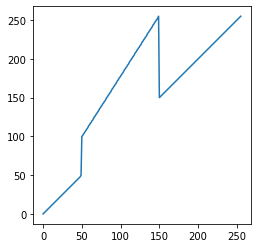

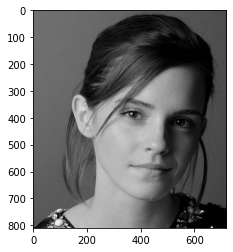

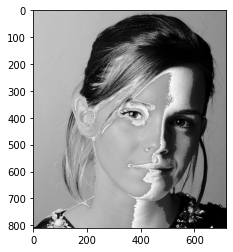

In [27]:
f = cv.imread(r'emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert f is not None

gamma = 0.2

t1 = np.linspace(0,50,50)

t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)
t = np.conctenate((t1,t2,t3),axis=0).astype(np.uint8)


fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(f,t)

newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)
# fig2,ax2 = plt.subplots()
# ax2.plot(t)
fig3,ax3 = plt.subplots()
ax3.imshow(newg)

# Q2

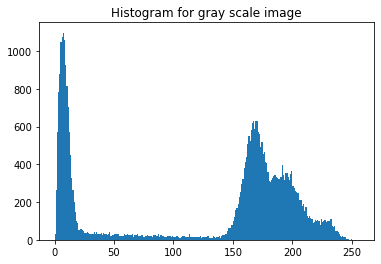

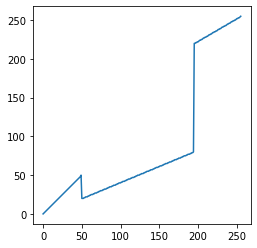

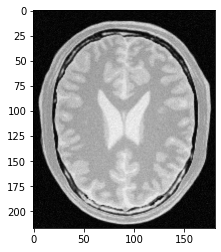

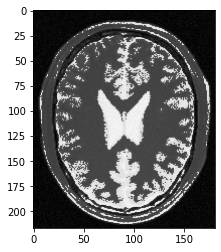

In [69]:
f = cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

assert f is not None
hist = cv.calcHist(f,[0],None, [256], (0,256), accumulate=False)
plt.hist(f.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()

gamma = 0.2
lowerb = 50
upperb = 195
t1 = np.linspace(0,50,lowerb)
t2 = np.linspace(20,80,upperb-lowerb)
t3 = np.linspace(220,255,256-upperb)



t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(f,t)

newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)
fig3,ax3 = plt.subplots()
ax3.imshow(newg)

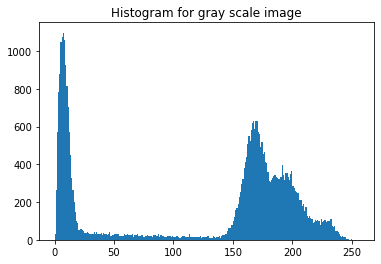

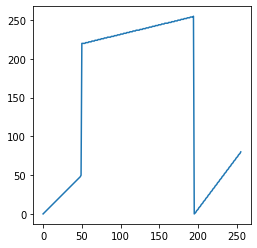

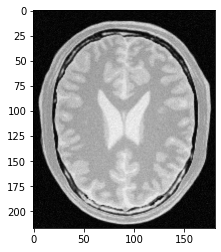

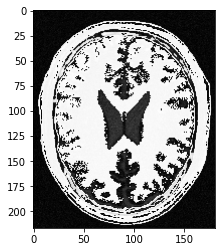

In [71]:
f = cv.imread(r'brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)

assert f is not None
hist = cv.calcHist(f,[0],None, [256], (0,256), accumulate=False)
plt.hist(f.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()
gamma = 0.2
lowerb = 50
upperb = 195
t1 = np.linspace(0,50,lowerb)
t2 = np.linspace(220,255,upperb-lowerb)
t3 = np.linspace(0,80,256-upperb)



t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256

g = cv.LUT(f,t)

newf = cv.cvtColor(f,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newf)
fig3,ax3 = plt.subplots()
ax3.imshow(newg)

# Q3

Text(0.5, 1.0, 'Histogram for Gamma corrected image')

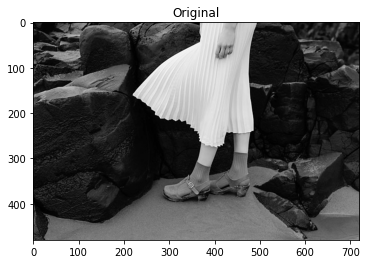

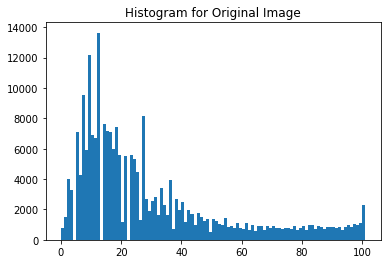

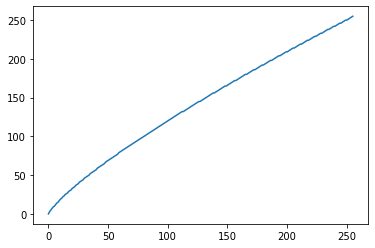

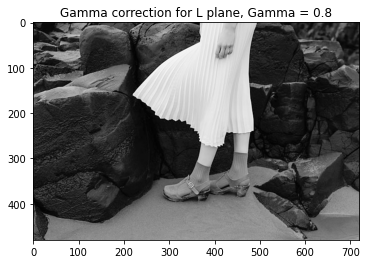

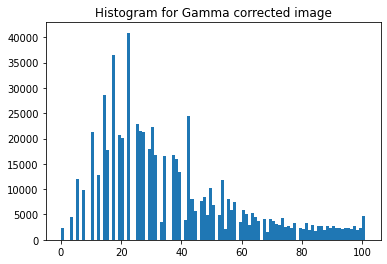

In [219]:
#f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_GRAYSCALE)
f = cv.imread(r'highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert f is not None
Lab = cv.cvtColor(f,cv.COLOR_BGR2LAB)
L,a,b = cv.split(Lab)
gamma = 0.8

t = np.array([(p/255)**gamma*255 for p in range(256)]).astype(np.uint8)
g = cv.LUT(L,t)
newL = cv.cvtColor(L,cv.COLOR_BGR2RGB)
newg = cv.cvtColor(g,cv.COLOR_BGR2RGB)
fig1,ax1 = plt.subplots()
ax1.imshow(newL)

fig4,ax4 = plt.subplots()
hist1 = cv.calcHist(L,[0],None, [101], (0,101), accumulate=False)
ax4.hist(L.ravel(),101,[0,101])
ax4.set_title('Histogram for Original Image')



fig2,ax2 = plt.subplots()
ax1.set_title("Original")
ax2.plot(t)
fig3,ax3 = plt.subplots()

ax3.set_title("Gamma correction for L plane, Gamma = 0.8")
ax3.imshow(newg)

fig5,ax5 = plt.subplots()
hist2 = cv.calcHist(newg,[0],None, [101], (0,101), accumulate=False)
ax5.hist(newg.ravel(),101,[0,101])
ax5.set_title('Histogram for Gamma corrected image')



# Q4

In [220]:
def displayImg(img,title):
    fig1,ax1 = plt.subplots()
    ax1.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
    ax1.set_title(title)
def displayHist(img):
    fig4,ax4 = plt.subplots()
    hist1 = cv.calcHist(img,[0],None, [256], (0,256), accumulate=False)
    ax4.hist(img.ravel(),256,[0,256])
    ax4.set_title('Histogram for Equalized Image')
    return hist1

def nonZeroMin(arr):
    nMin = arr[0]
    for i in arr:
        if arr[i][0]<nMin and arr[i][0]>0:
            nMin = arr[i][0]
        if nMin==0:
            nMin = arr[i][0]
        
    return nMin
        



def eqImg(img):
    h =  cv.calcHist([img],[0],None,[256],[0,256])
    cdf = np.cumsum(h)/img.size
    scaledcdf = np.round([cdf*255]).astype(np.uint8)
    imgEqualized = cv.cvtColor(cv.LUT(img,scaledcdf),cv.COLOR_BGR2RGB)

    displayImg(imgEqualized,"Histogram Eq Using custom Function")
    displayHist(imgEqualized)
    # fig,ax = plt.subplots()
    # ax.plot(cdf)
    # displayImg(img)
    # displayHist(img)


Text(0.5, 1.0, 'Histogram for equalized image(in-built')

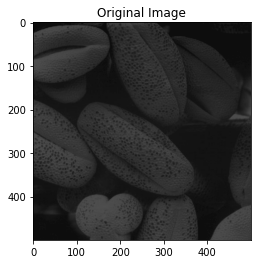

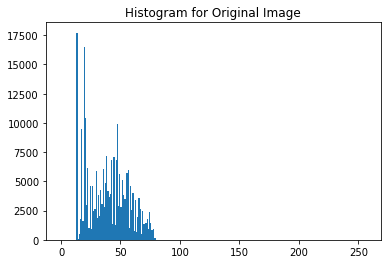

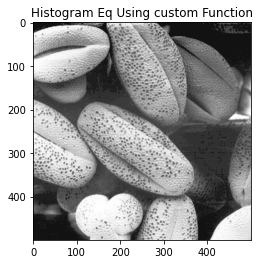

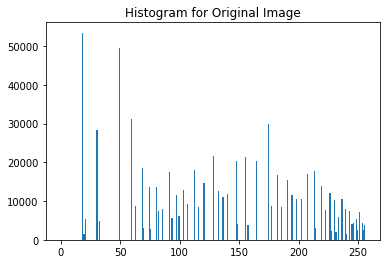

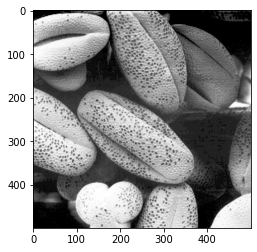

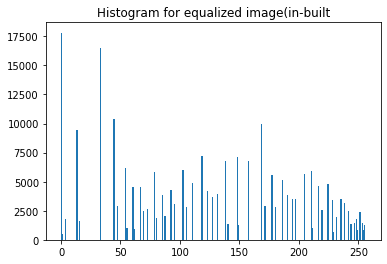

In [221]:
img = cv.imread("shells.png",cv.IMREAD_GRAYSCALE)

eqimg = cv.equalizeHist(img)
displayImg(img,"Original Image")
fig4,ax4 = plt.subplots()
hist1 = cv.calcHist(img,[0],None, [256], (0,256), accumulate=False)
ax4.hist(img.ravel(),256,[0,256])
ax4.set_title('Histogram for Original Image')
eqImg(img) #Custom Function

fig2,ax2 = plt.subplots()
ax2.imshow(cv.cvtColor(eqimg,cv.COLOR_BGR2RGB))

fig3,ax3 = plt.subplots()
hist2 = cv.calcHist(eqimg,[0],None, [256], (0,256), accumulate=False)
ax3.hist(eqimg.ravel(),256,[0,256])
ax3.set_title('Histogram for equalized image(in-built')



# Q5

In [179]:
def zoomImage(img,s,mode="a",isCrop=True):
    rows = int(img.shape[0]*s)
    cols = int(img.shape[1]*s)
    zoomed = np.zeros((rows,cols),dtype=img.dtype)
    for i in range(rows):
        for j in range(cols):
            if mode =="b":
                rowf = i/s
                colf = j/s
                c1 = colf-int(colf)
                c2 = 1-c1
                r1 = rowf-int(rowf)
                r2 = 1-r1
           
                if int(colf)+1>= img.shape[1] or int(rowf)+1>=img.shape[0]:
                    zoomed[i,j] = img[int(i/s),int(j/s)]
                else:
                    p11 =  img[int(rowf),int(colf)]
                    p12 = img[int(rowf),int(colf)+1]
                    p22 = img[int(rowf)+1,int(colf)+1]
                    p21 = img[int(rowf)+1,int(colf)]

                    zoomed[i,j] = (p11*r2+p21*r1)*c2+ (p12*r2+p22*r1)*c1
                    
            else:
                zoomed[i,j] = img[int(i/s),int(j/s)]
    if(s>1 and isCrop):

        croppedimg = zoomed[0:img.shape[0],0:img.shape[1]]
    else:
        croppedimg = zoomed
    displayImg(croppedimg,"Zoomed")
    return croppedimg.astype(np.uint8)


Similarity =  0.9791446231089447


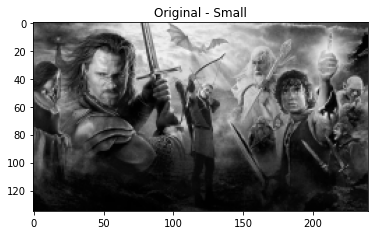

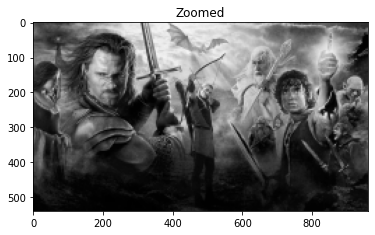

In [212]:
img = cv.imread('im01small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
originalimg = cv.imread('im01.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)

displayImg(img,"Original - Small")
s =4
zoomed = zoomImage(img,s,"a",False)
errorL2 = cv.norm( originalimg, zoomed, cv.NORM_L2 )

similarity = 1 - errorL2 / ( originalimg.shape[0] * originalimg.shape[1]) 
print('Similarity = ',similarity)

Similarity =  0.975609566680727


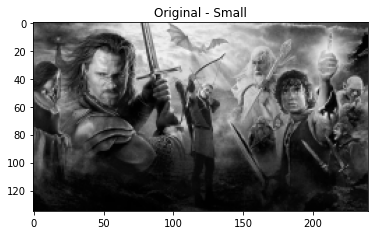

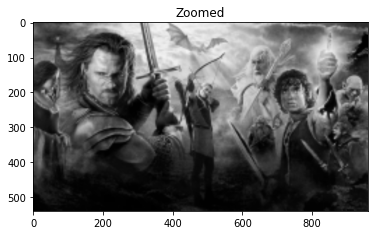

In [181]:
img = cv.imread('im01small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
originalimg = cv.imread('im01.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)

displayImg(img,"Original - Small")
s =4
zoomed = zoomImage(img,s,"b",False)
errorL2 = cv.norm( originalimg, zoomed, cv.NORM_L2 )

similarity = 1 - errorL2 / ( originalimg.shape[0] * originalimg.shape[1]) 
print('Similarity = ',similarity)

# displayImg(img,"")
# scaledimg =cv.resize(img,None,fx=s,fy=s,interpolation=cv.INTER_LINEAR)
# croppedimg = scaledimg[500:img.shape[0]+500,500:img.shape[1]+500]

# displayImg(croppedimg,"")

Similarity =  0.9899467986013276


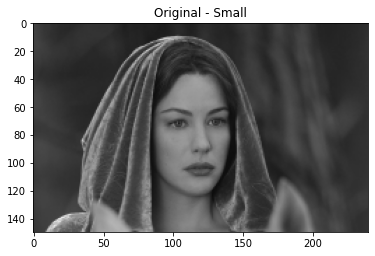

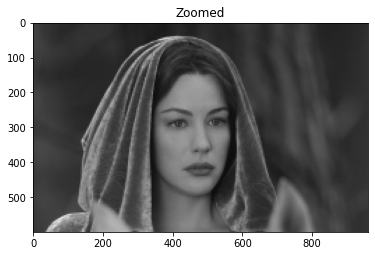

In [214]:
img = cv.imread('im02small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
originalimg = cv.imread('im02.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)

displayImg(img,"Original - Small")
s =4
zoomed = zoomImage(img,s,"a",False)
errorL2 = cv.norm( originalimg, zoomed, cv.NORM_L2 )

similarity = 1 - errorL2 / ( originalimg.shape[0] * originalimg.shape[1]) 
print('Similarity = ',similarity)

Similarity =  0.9868672354958886


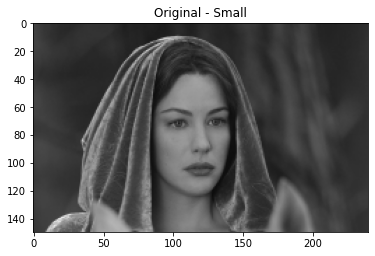

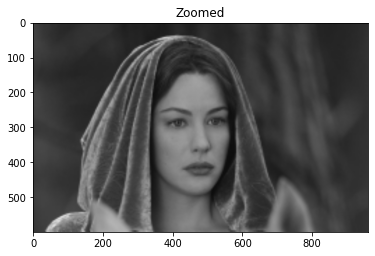

In [182]:
img = cv.imread('im02small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
originalimg = cv.imread('im02.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)

displayImg(img,"Original - Small")
s =4
zoomed = zoomImage(img,s,"b",False)
errorL2 = cv.norm( originalimg, zoomed, cv.NORM_L2 )

similarity = 1 - errorL2 / ( originalimg.shape[0] * originalimg.shape[1]) 
print('Similarity = ',similarity)

Similarity =  0.9875434655067302


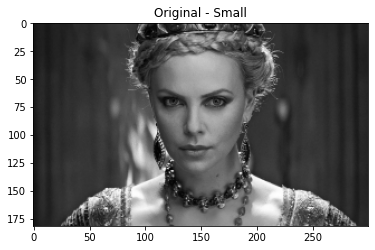

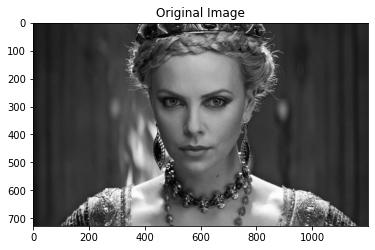

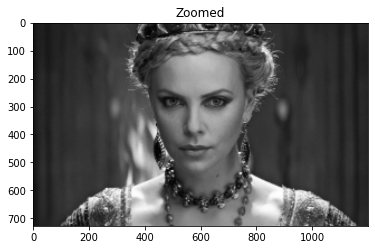

In [215]:
img = cv.imread('im03small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
originalimg = cv.imread('im03.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)
originalimg = originalimg[0:728,0:1200]
displayImg(img,"Original - Small")
displayImg(originalimg,"Original Image")
s =4
zoomed = zoomImage(img,s,"a",False)
# print(zoomed.shape)
# print(originalimg.shape)
errorL2 = cv.norm( originalimg, zoomed, cv.NORM_L2 )

similarity = 1 - errorL2 / ( originalimg.shape[0] * originalimg.shape[1]) 
print('Similarity = ',similarity)

Similarity =  0.9875434655067302


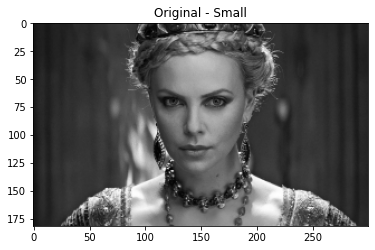

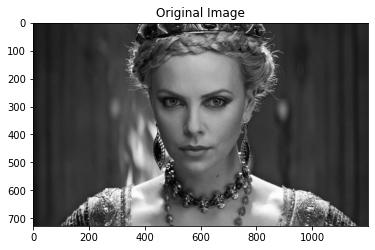

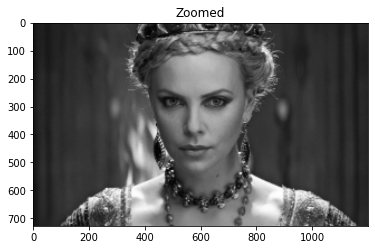

In [217]:
img = cv.imread('im03small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
originalimg = cv.imread('im03.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)
originalimg = originalimg[0:728,0:1200]
displayImg(img,"Original - Small")
displayImg(originalimg,"Original Image")
s =4
zoomed = zoomImage(img,s,"a",False)
# print(zoomed.shape)
# print(originalimg.shape)
errorL2 = cv.norm( originalimg, zoomed, cv.NORM_L2 )

similarity = 1 - errorL2 / ( originalimg.shape[0] * originalimg.shape[1]) 
print('Similarity = ',similarity)

Similarity =  0.9844297836868299


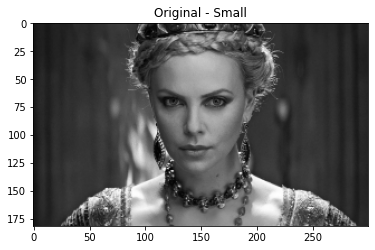

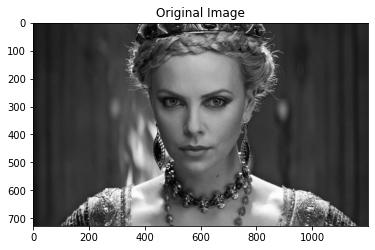

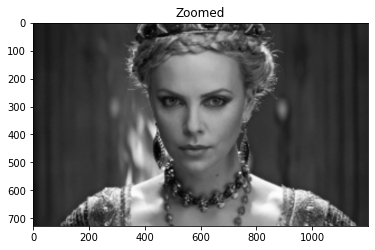

In [216]:
img = cv.imread('im03small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
originalimg = cv.imread('im03.png',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.uint8)
originalimg = originalimg[0:728,0:1200]
displayImg(img,"Original - Small")
displayImg(originalimg,"Original Image")
s =4
zoomed = zoomImage(img,s,"b",False)
# print(zoomed.shape)
# print(originalimg.shape)
errorL2 = cv.norm( originalimg, zoomed, cv.NORM_L2 )

similarity = 1 - errorL2 / ( originalimg.shape[0] * originalimg.shape[1]) 
print('Similarity = ',similarity)

# Q6 (a)

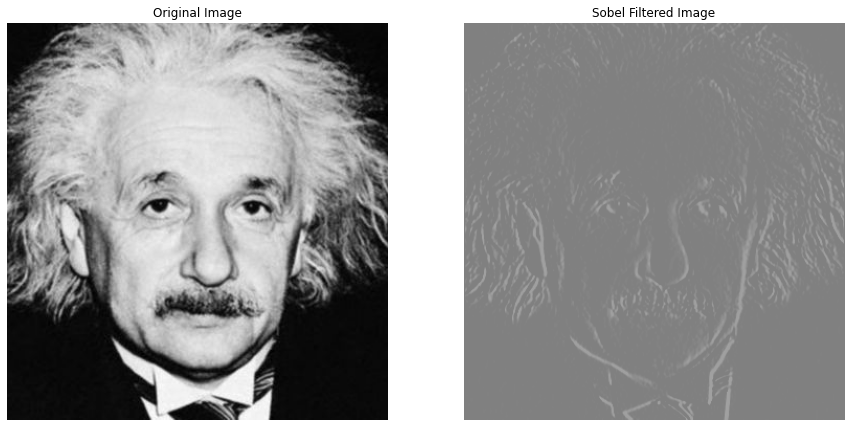

In [209]:
img = cv.imread(r"einstein.png", cv.IMREAD_GRAYSCALE)

kernel = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype='float')
imgc = cv.filter2D(img, -1, kernel)

fig, ax = plt.subplots(1, 2 , sharex = 'all', sharey = 'all', figsize = (15,15))
ax[0].imshow(img, cmap = 'gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(imgc, cmap = 'gray',vmax = 1020, vmin = -1020)
ax[1].set_title('Sobel Filtered Image')
ax[1].axis('off')
plt.show()

# Q6 (b)


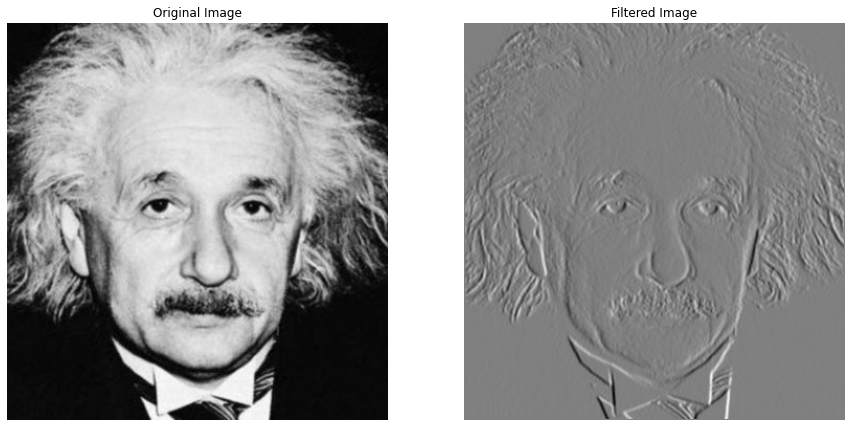

In [210]:
def sobelFilter (image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    k_hh, k_hw = math.floor(kernel.shape[0]/2) , math.floor(kernel.shape[1]/2)
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m,n] = np.dot(image_float[m-k_hh:m + k_hh+1, n-k_hw:n+ k_hw+1].flatten(), kernel.flatten())

    return result


img = cv.imread(r"einstein.png", cv.IMREAD_GRAYSCALE)
sobel_H = np.array([(1,0,-1),(2,0,-2),(1,0,-1)], dtype='float')
imgc = sobelFilter(img, sobel_H)
imgc = imgc*255.0

fig, ax = plt.subplots(1,2, sharex= 'all', sharey= 'all', figsize = (15,15))
ax[0].imshow(img, cmap ='gray')
ax[1].imshow(imgc, cmap ='gray', vmax = 780, vmin = -780)

ax[0].set_title('Original Image')
ax[1].set_title('Filtered Image')
ax[1].axis('off')
ax[0].axis('off')

plt.show()

# Q6(c)

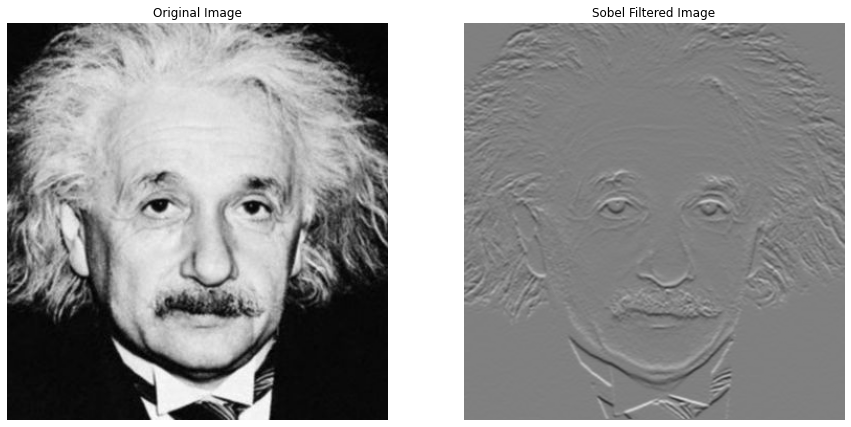

In [211]:
img = cv.imread(r"einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

array_1 = np.array([[1],[2],[1]], dtype=np.float32)
array_2 = np.array([[1, 0, -1]], dtype=np.float32)

imgc = cv.sepFilter2D(img, -1, array_1, array_2)
fig, ax = plt.subplots(1, 2 , sharex = 'all', sharey = 'all', figsize = (15,15))

ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(imgc, cmap = 'gray', vmax = 1020, vmin = -1020 )
ax[1].set_title('Sobel Filtered Image')
ax[1].axis('off')
ax[0].set_title('Original Image')
ax[0].axis('off')
plt.show()

# Q7(a)

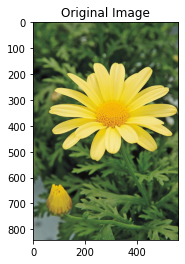

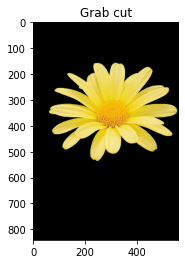

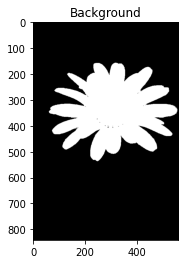

In [192]:
img = cv.imread(r"daisy.jpg", cv.IMREAD_COLOR)              
mask = np.zeros(img.shape[:2],np.uint8)                                                             

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,120,550,500)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = (mask2 * 255).astype(np.uint8)
img_cut = img*mask2[:,:,np.newaxis]


displayImg(img,"Original Image")
displayImg(img_cut,"Grab cut")
displayImg(mask3,"Background")


# Q7(b)

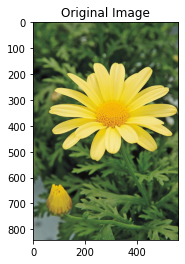

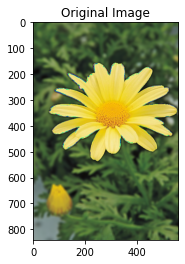

In [194]:
img = cv.imread(r"daisy.jpg", cv.IMREAD_COLOR)             
mask = np.zeros(img.shape[:2],np.uint8)                                                               


bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,120,550,500) 
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
mask3 = (mask2 * 255).astype(np.uint8)
img_cut = img*mask2[:,:,np.newaxis]

blurred_img = cv.blur(img-img_cut, (10,10))
blurred_background_img = img_cut + blurred_img

displayImg(img,"Original Image")
displayImg(blurred_background_img,"Original Image")

# fig, ax = plt.subplots(1,2, sharex = 'all', sharey = 'all', figsize = (10,10))
# ax[0].imshow(new_img)
# ax[0].set_title('Input Image', color = 'r')
# ax[0].axis('off')

# ax[1].imshow(blurred_background_img)
# ax[1].set_title('Blurred Background Image', color = 'r')
# ax[1].axis('off')
# plt.show()